# Predict the Cost of Homes in California 
#### Feature Variables
1. longitude: A measure of how far west a house is (a higher value is farther west)
2. latitude: A measure of how far north a house is (a higher value is farther north)
3. housingMedianAge: Median age of a house within a block (a lower number is a newer building)
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. oceanProximity: Location of the house in proximity to the ocean
#### Target Variable
1. medianHouseValue: Median house value for households within a block (measured in US Dollars)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load data

In [2]:
# read data
housing_df = pd.read_csv("../DATA/housing.csv")

In [3]:
# count : row,column
housing_df.shape

(20640, 10)

In [4]:
# peek 5 rows at random
housing_df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10158,-118.35,33.99,47.0,2183.0,380.0,927.0,371.0,4.9531,180100.0,<1H OCEAN
12584,-122.25,38.02,16.0,1803.0,267.0,946.0,266.0,5.7001,205100.0,NEAR BAY
9501,-117.02,32.67,20.0,1505.0,184.0,635.0,182.0,6.5772,245200.0,NEAR OCEAN
8107,-118.27,34.06,30.0,1771.0,788.0,2188.0,764.0,1.5885,154200.0,<1H OCEAN
8340,-122.49,37.76,52.0,2564.0,502.0,1092.0,459.0,3.5302,329600.0,NEAR BAY


In [5]:
# dataframe basic info
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# summary descriptive stats
housing_df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Preprocess Data

In [7]:
# which features have missing values
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# % of missing data for total_bedrooms feature
round(housing_df.total_bedrooms.isnull().sum() / housing_df.shape[0], 2)

0.01

about 1% of data missing, rows can be removed or data can be imputed using machine learning like the KNNImputer from scitkit learn

In [9]:
from sklearn.impute import KNNImputer

# initialize KNNImputer
imputer = KNNImputer(n_neighbors=3)

In [10]:
# column with missing data
column_to_impute = housing_df[["total_bedrooms"]]
# fit and transform data
total_bedrooms_imputed = imputer.fit_transform(column_to_impute)

# replace the old column missing values with the imputed data
data_df = housing_df.copy()
data_df["total_bedrooms"] = total_bedrooms_imputed.flatten()


In [11]:
# confirm there are no columns with missing values
data_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Plot features distribution

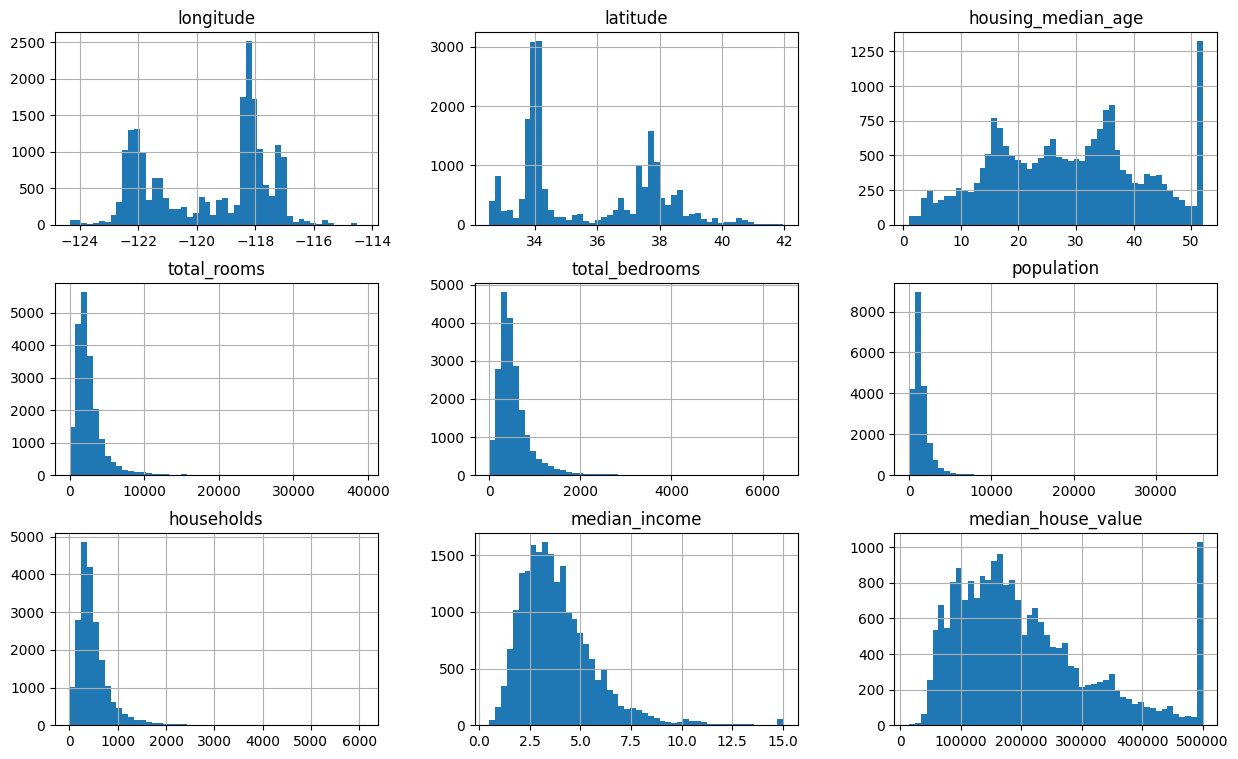

In [115]:
data_df.hist(bins=50, figsize=(15, 9))
plt.show()

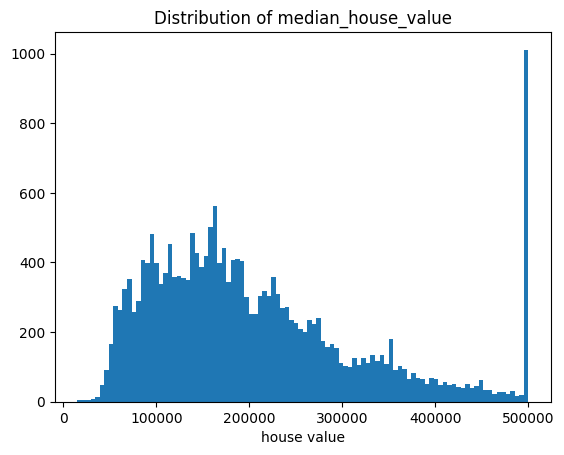

In [ ]:
# Plot the distribution of the target variable 
plt.hist(data_df.median_house_value, bins=100)
plt.title("Distribution of median_house_value")
plt.xlabel("house value")
plt.show() 

Use a heatmap to show correlation

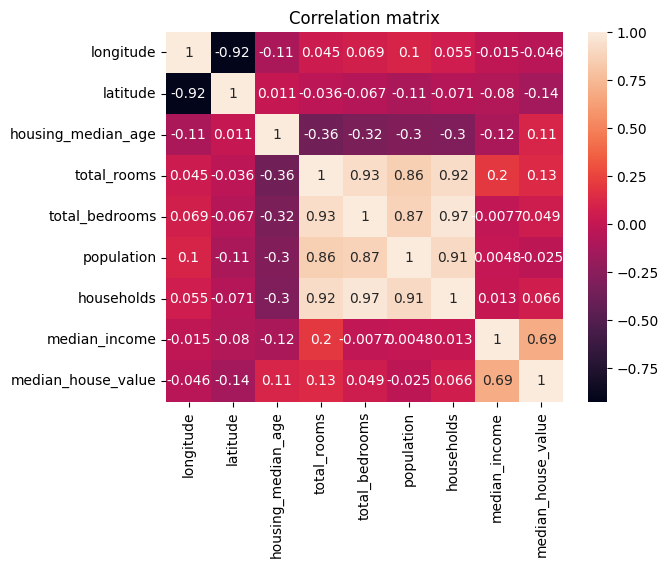

In [12]:
sns.heatmap(data_df.corr(numeric_only=True), annot=True)
plt.title("Correlation matrix")
plt.show()

correlation between multiple features :
- population and households
- total_rooms and households
- total_bedrooms and total_rooms
- longitude and latitude

Feature Engineering can reduce redundancy

In [14]:
#  a new feature that is a ratio of the population to households
data_df["population_per_household"] = data_df.population / data_df.households

#  a new feature that is a ratio of the total rooms to households
data_df["total_rooms_per_household"] = data_df.total_rooms / data_df.households

#  a new feature that is a ratio of the total bedrooms to total rooms
data_df["total_bedrooms_per_rooms"] = data_df.total_bedrooms / data_df.total_rooms

#  a new feature that is longitude and latitude combined
data_df["coords"] = data_df.longitude / data_df.latitude

In [15]:
# remove correlated features
data = data_df.drop(["longitude", "latitude", "total_rooms", "total_bedrooms", "population", "households"], axis=1)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   housing_median_age         20640 non-null  float64
 1   median_income              20640 non-null  float64
 2   median_house_value         20640 non-null  float64
 3   ocean_proximity            20640 non-null  object 
 4   population_per_household   20640 non-null  float64
 5   total_rooms_per_household  20640 non-null  float64
 6   total_bedrooms_per_rooms   20640 non-null  float64
 7   coords                     20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


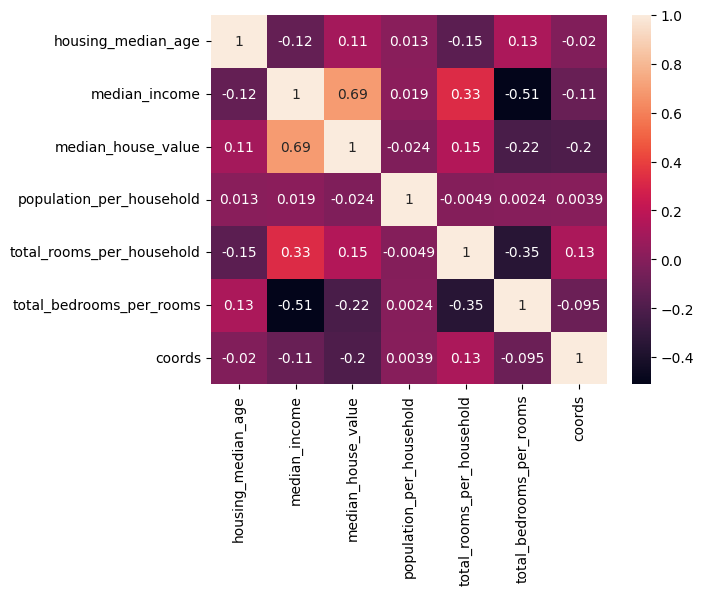

In [17]:
# Heatmap after removing high correlation
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.show()

Encode categorical data

In [18]:
# unique values for ocean_proximity feature
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [20]:
# One-Hot Encoding using pandas
data_encoded = pd.get_dummies(data=data, columns=["ocean_proximity"])
data_encoded.sample(3)

,housing_median_age,median_income,median_house_value,population_per_household,total_rooms_per_household,total_bedrooms_per_rooms,coords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5100,23.0,4.5000,237300.0,2.628242,4.835735,0.219905,-3.483156,True,False,False,False,False
15093,5.0,4.0579,167100.0,2.496368,4.876513,0.222443,-3.429026,False,True,False,False,False
223,17.0,4.4728,205800.0,3.335714,6.042857,0.173168,-3.495998,True,False,False,False,False


In [21]:
# replace special characters in columns name
data_encoded.columns = (
    data_encoded.columns
    .str.replace(" ", "_")
    .str.replace("<", "_")
    .str.lower())
data_encoded.columns

Index(['housing_median_age', 'median_income', 'median_house_value',
       'population_per_household', 'total_rooms_per_household',
       'total_bedrooms_per_rooms', 'coords', 'ocean_proximity__1h_ocean',
       'ocean_proximity_inland', 'ocean_proximity_island',
       'ocean_proximity_near_bay', 'ocean_proximity_near_ocean'],
      dtype='object')

In [ ]:
# seperate data:  features / target var 
X = data_encoded.drop("median_house_value", axis=1)
y = data_encoded.median_house_value

In [23]:
from sklearn.model_selection import train_test_split

In [ ]:
# split data into training / test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [25]:
# peek data shape after split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 11), (4128, 11), (16512,), (4128,))

## Model training

In [26]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

In [27]:
# train
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
# predict
y_pred = lr_model.predict(X_test)

In [34]:
# compare values 
pd.DataFrame({"Actual": y_test, "Predicted": y_pred.round(2), "Difference": abs((y_test - y_pred).round(2))}).sample(3)

,Actual,Predicted,Difference
5117,221500.0,234563.44,13063.44
971,98500.0,162427.16,63927.16
8284,189600.0,242706.95,53106.95


### Evaluate the model

In [35]:
# R2
lr_model.score(X_test, y_test)

0.6021477672316072

### Randorm Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
# train different model
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# rf predictions
y_pred_rf = rf_model.predict(X_test)

In [40]:
# compare values 
pd.DataFrame({"Actual": y_test, "Predicted": y_pred_rf.round(2), "Difference": abs((y_test - y_pred_rf).round(2))}).sample(3)

,Actual,Predicted,Difference
6243,158500.0,134650.0,23850.0
11149,216200.0,224180.0,7980.0
18308,218100.0,241270.0,23170.0


In [42]:
# R2 for rf
rf_model.score(X_test, y_test)

0.769733266059799

random forest captures more variance 

### XGBoost

In [44]:
from xgboost import XGBRegressor

In [45]:
# train different model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [46]:
# xgb predictions
y_pred_xgb = xgb_model.predict(X_test)

In [47]:
# compare values 
pd.DataFrame({"Actual": y_test, "Predicted": y_pred_xgb.round(2), "Difference": abs((y_test - y_pred_xgb).round(2))}).sample(3)

,Actual,Predicted,Difference
720,137900.0,193055.734375,55155.73
15879,119400.0,95290.109375,24109.89
20318,450000.0,253575.593750,196424.39


In [48]:
# R2
xgb_model.score(X_test, y_test)

0.7846531369344864

xgb better model, captures more variance without tuning 

In [49]:
# xgb try with some hyper parameters
xgb_model_2 = XGBRegressor(
    gamma=0.05,
    learning_rate=0.01,
    max_depth=6,
    n_estimators=1000,
    n_jobs=16,
    objective='reg:squarederror',
    subsample=0.8,
    scale_pos_weight=0,
    reg_alpha=0,
    reg_lambda=1,
    verbosity=1
    )

xgb_model_2.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [50]:
y_pred_xgb2 = xgb_model_2.predict(X_test)

In [51]:
# compare values 
pd.DataFrame({"Actual": y_test, "Predicted": y_pred_xgb2.round(2), "Difference": abs((y_test - y_pred_xgb2).round(2))}).sample(3)

,Actual,Predicted,Difference
4189,105400.0,133013.859375,27613.86
4013,220600.0,249217.343750,28617.34
482,86500.0,90279.601562,3779.60


In [52]:
# R2
xgb_model_2.score(X_test, y_test)

0.7984804131084667

### scikit-learn metrics

In [53]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [54]:
# R2
r2_xgb_2 = r2_score(y_test, y_pred_xgb2)
f"R2 xgb_model_2 : {round(r2_xgb_2, 4)}"

'R2 xgb_model_2 : 0.7985'

In [60]:
# mse
mse_xgb_2 = mean_squared_error(y_test, y_pred_xgb2)
f"mse xgb_model_2 : {round(mse_xgb_2, 2)}"

'mse xgb_model_2 : 2793579511.26'

In [59]:
# rmse
rmse_xgb_2 = root_mean_squared_error(y_test, y_pred_xgb2)
f"rmse xgb_model_2 : {round(rmse_xgb_2, 2)}"

'rmse xgb_model_2 : 52854.32'

In [61]:
# mae
mae_xgb_2 = mean_absolute_error(y_test, y_pred_xgb2)
f"mae xgb_model_2 : {round(mae_xgb_2, 2)}"

'mae xgb_model_2 : 35164.8'

## Feature Importance

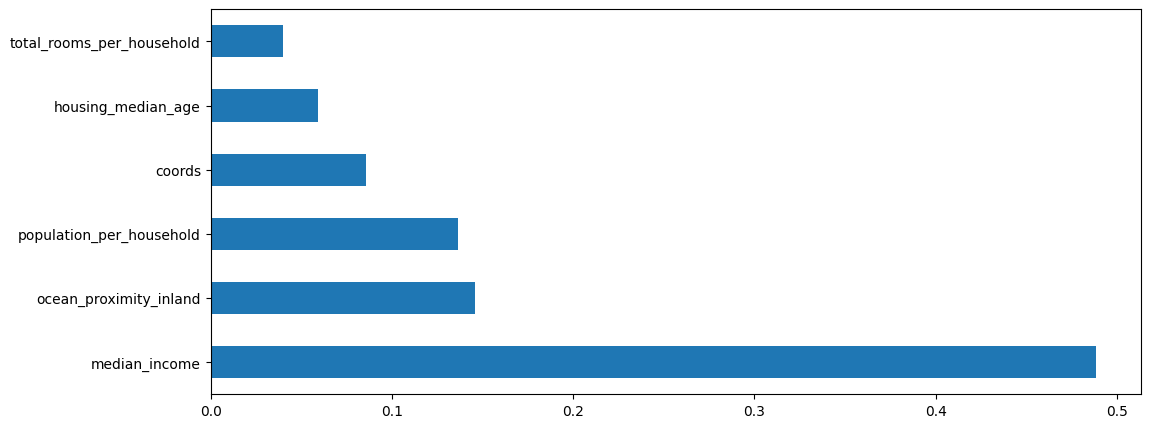

In [ ]:
plt.figure(figsize=(12, 5))

features_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
features_importances.nlargest(6).plot(kind="barh")

plt.show()

In [68]:
# select top features
X_train_top_features = X_train[["total_rooms_per_household", "housing_median_age", "coords", "population_per_household", "ocean_proximity_inland", "median_income"]]
X_test_top_features = X_test[["total_rooms_per_household", "housing_median_age", "coords", "population_per_household", "ocean_proximity_inland", "median_income"]]

In [69]:
# retrain model with top important feautures
xgb_model_3 = XGBRegressor(
    gamma=0.05,
    learning_rate=0.01,
    max_depth=6,
    n_estimators=1000,
    n_jobs=16,
    objective='reg:squarederror',
    subsample=0.8,
    scale_pos_weight=0,
    reg_alpha=0,
    reg_lambda=1,
    verbosity=1
    )

xgb_model_3.fit(X_train_top_features, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [70]:
y_pred_xgb3 = xgb_model_3.predict(X_test_top_features)

In [73]:
# R2
xgb_model_3.score(X_test_top_features, y_test)

0.7933890232278484

no improvement. actually there's a little decrease in perfomance 